# PMF, CDF, Joint Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Ali Borzoozadeh

*SID:* 810102410

The objective of this notebook is to understand the concepts of PMF and CDF and joint distribution.

In [1]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parameters

In [2]:
num_counters = 1
arrival_rate = 5  # customers per minute
service_rate = 6  # customers per minute
simulation_time = 10000  # minutes

## Simulation

In [3]:
def simulate_queue_system():
    """
    Simulates a queue system with customers arriving at service counters, waiting for service, and being served.

    This function defines the customer behavior and the setup of the simulation environment. It initializes the simulation environment, sets up the service counters, and continuously generates customer arrivals based on specified arrival and service rates. The function runs the simulation until the specified simulation time and returns the recorded wait times, arrival times, and service times of the customers.

    Returns:
        tuple: A tuple containing three lists - wait_times, arrival_times, and service_times, which record the respective times for each customer in the simulation.
    """

    def customer(
        env: simpy.Environment,
        name: str,
        counter: simpy.Resource,
        service_time: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Simulates a customer arriving at a service counter, waiting for service, and then being served.

        Args:
            env (simpy.Environment): The simulation environment.
            name (str): The name of the customer.
            counter (simpy.Resource): The service counter resource.
            service_time (float): The time it takes to serve the customer.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Process: The process of the customer being served.
        """
        arrival_time = env.now
        arrival_times.append(arrival_time)
        with counter.request() as req:
            yield req
            yield env.timeout(service_time)
            service_times.append(service_time)
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

    def setup(
        env: simpy.Environment,
        num_counters: int,
        arrival_rate: float,
        service_rate: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Sets up the simulation environment with a specified number of service counters and customer arrival and service rates.

        Args:
            env (simpy.Environment): The simulation environment.
            num_counters (int): The number of service counters available.
            arrival_rate (float): The rate at which customers arrive.
            service_rate (float): The rate at which customers are served.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Timeout: The timeout event for the next customer arrival.
        """
        counter = simpy.Resource(env, num_counters)
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            service_time = np.random.exponential(1 / service_rate)
            env.process(
                customer(
                    env,
                    "Customer",
                    counter,
                    service_time,
                    wait_times,
                    arrival_times,
                    service_times,
                )
            )

    while True:
        env = simpy.Environment()
        wait_times = []
        arrival_times = []
        service_times = []
        env.process(
            setup(
                env,
                num_counters,
                arrival_rate,
                service_rate,
                wait_times,
                arrival_times,
                service_times,
            )
        )
        env.run(until=simulation_time)

        if len(wait_times) == len(arrival_times) == len(service_times):
            return wait_times, arrival_times, service_times
        
wait_times, arrival_times, service_times = simulate_queue_system()

## Plot the RVs Distributions

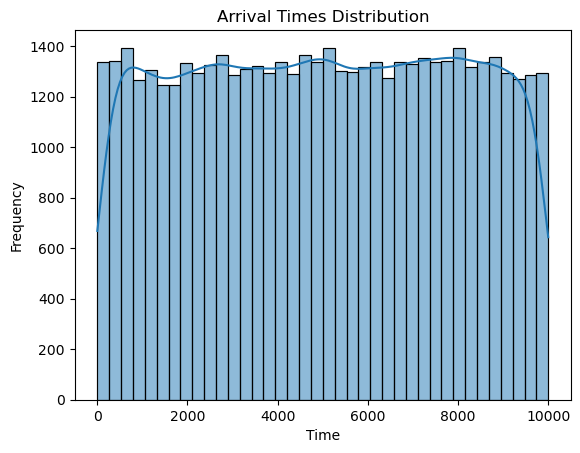

In [4]:
sns.histplot(arrival_times, kde=True)
plt.title('Arrival Times Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

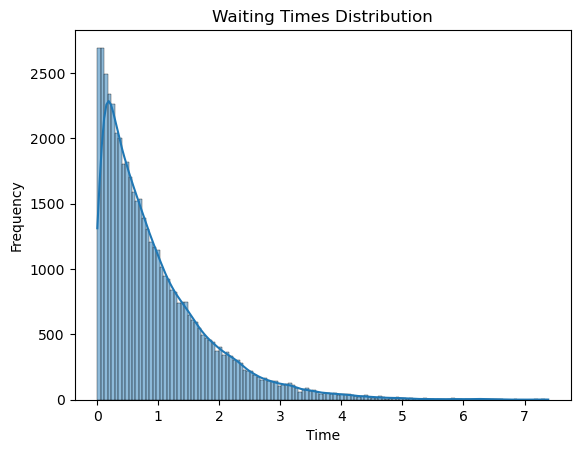

In [5]:
sns.histplot(wait_times, kde=True)
plt.title('Waiting Times Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

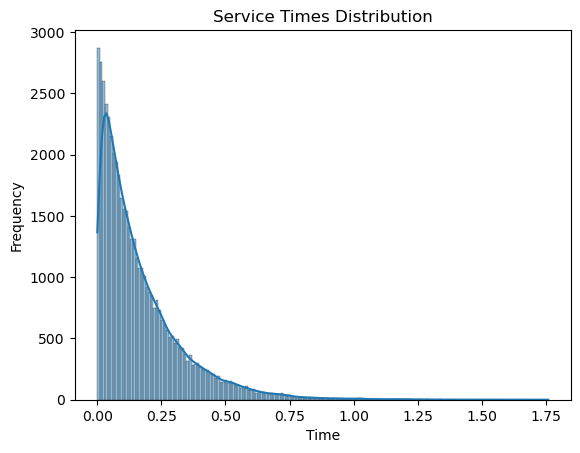

In [6]:
sns.histplot(service_times, kde=True)
plt.title('Service Times Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

The KDE (Kernel Density Estimation) argument is used to add a smooth, continuous line representing the probability density function of the data. 

- KDE=True: Adds the KDE line, providing a smoothed estimate of the data distribution.
- KDE=False: Displays only the histogram without the KDE line, showing the raw frequency of data points.

For example in Arrival Times Distribution:

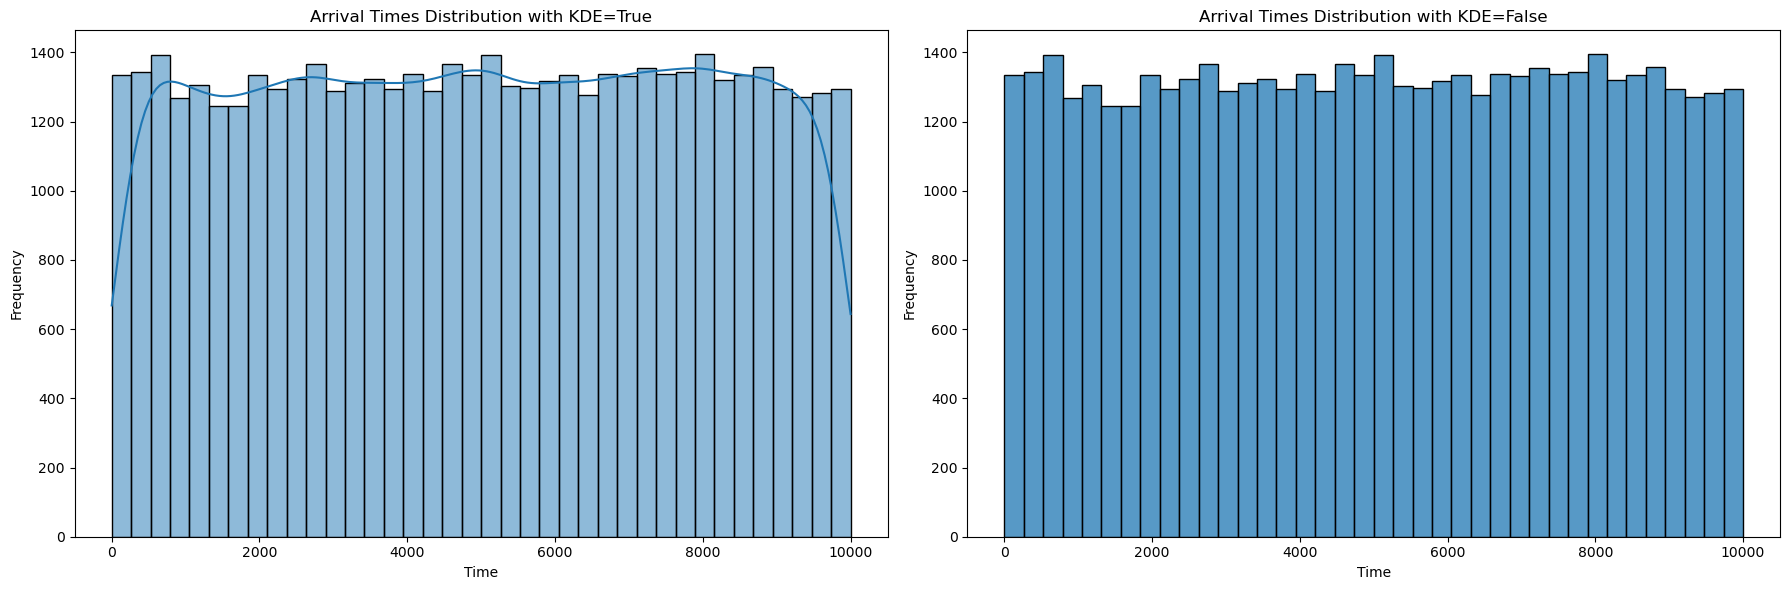

In [7]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(arrival_times, kde=True)
plt.title('Arrival Times Distribution with KDE=True')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(arrival_times, kde=False)
plt.title('Arrival Times Distribution with KDE=False')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Plot the Joint Distributions

**Note:** Use `sns.jointplot` to plot the joint distributions

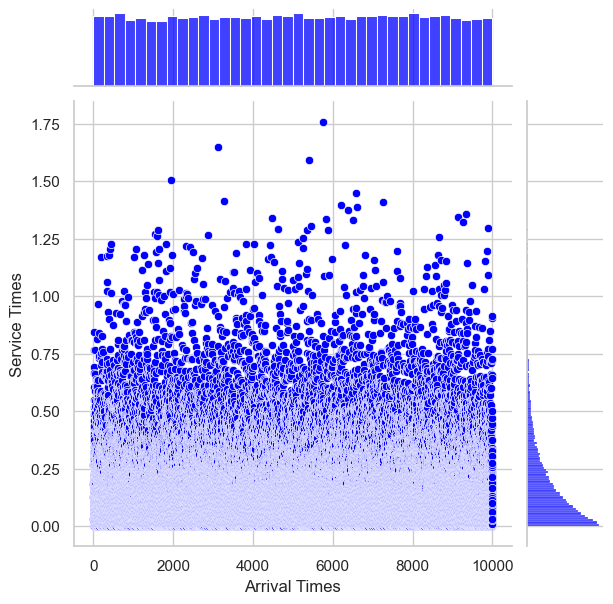

In [8]:
sns.set(style="whitegrid")
sns.jointplot(x=arrival_times, y=service_times, kind="scatter", color="blue")
plt.xlabel("Arrival Times")
plt.ylabel("Service Times")
plt.show()

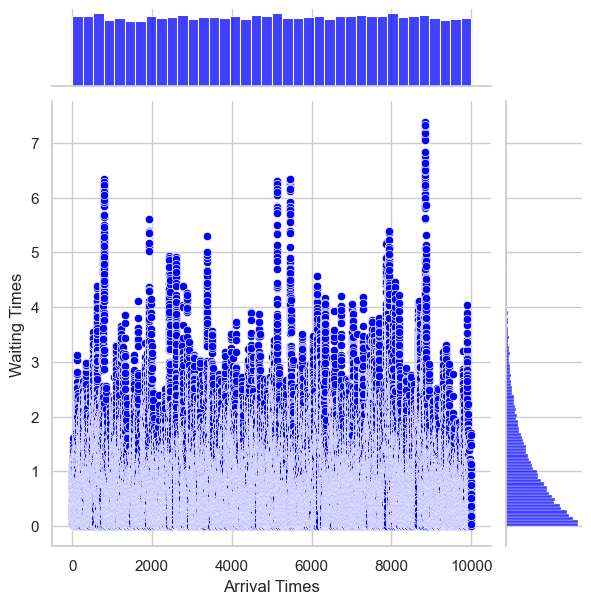

In [9]:
sns.set(style="whitegrid")
sns.jointplot(x=arrival_times, y=wait_times, kind="scatter", color="blue")
plt.xlabel("Arrival Times")
plt.ylabel("Waiting Times")
plt.show()

## Analysis of Joint Distributions

The correlation coefficient is high when the values ​​of the two graphs are close to a line and have a linear dependence, but here this is not visible and the correlation coefficient will be low.

## Scatter Plot and Correlation

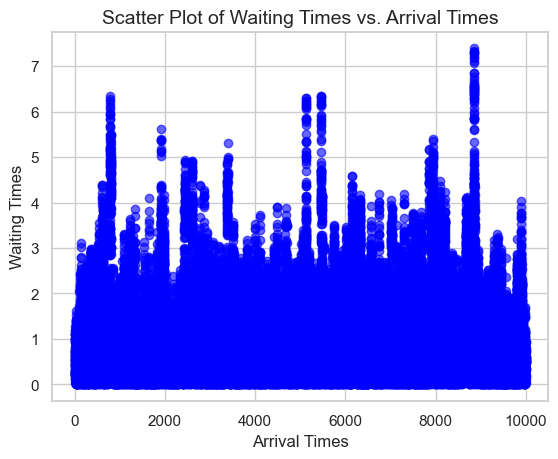

In [10]:
plt.scatter(arrival_times, wait_times, alpha=0.6, color='blue')
plt.title("Scatter Plot of Waiting Times vs. Arrival Times", fontsize=14)
plt.xlabel("Arrival Times", fontsize=12)
plt.ylabel("Waiting Times", fontsize=12)
plt.show()

In [11]:
mean_arrival = np.mean(arrival_times)
mean_wait = np.mean(wait_times)

covariance = sum((x - mean_arrival) * (y - mean_wait) for x, y in zip(arrival_times, wait_times))

variance_x = sum((x - mean_arrival) ** 2 for x in arrival_times)
variance_y = sum((y - mean_wait) ** 2 for y in wait_times)

correlation_coefficient = covariance / np.sqrt(variance_x * variance_y)

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")

Correlation Coefficient: 0.0174


## Calculating `total_times`

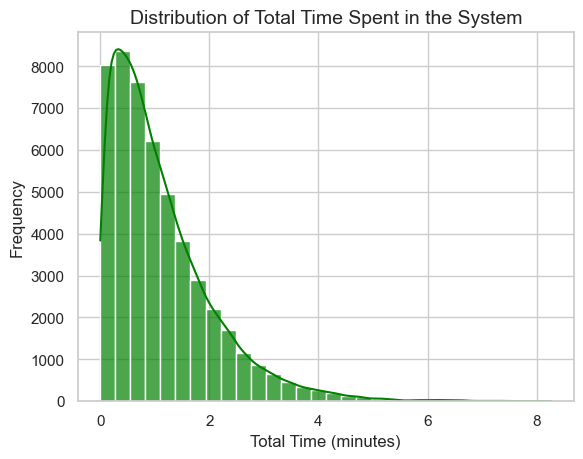

In [12]:
total_times = [wait + service for wait, service in zip(wait_times, service_times)]

sns.histplot(total_times, kde=True, bins=30, color='green', alpha=0.7)
plt.title("Distribution of Total Time Spent in the System", fontsize=14)
plt.xlabel("Total Time (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

The graph of the sum of two exponential variables that are independent, according to the convolution formula, has a critical point and a maximum value. These two variables are not independent but are almost uncorrelated, and their sum graph reaches a maximum value early on.

## Conditional Wait Times

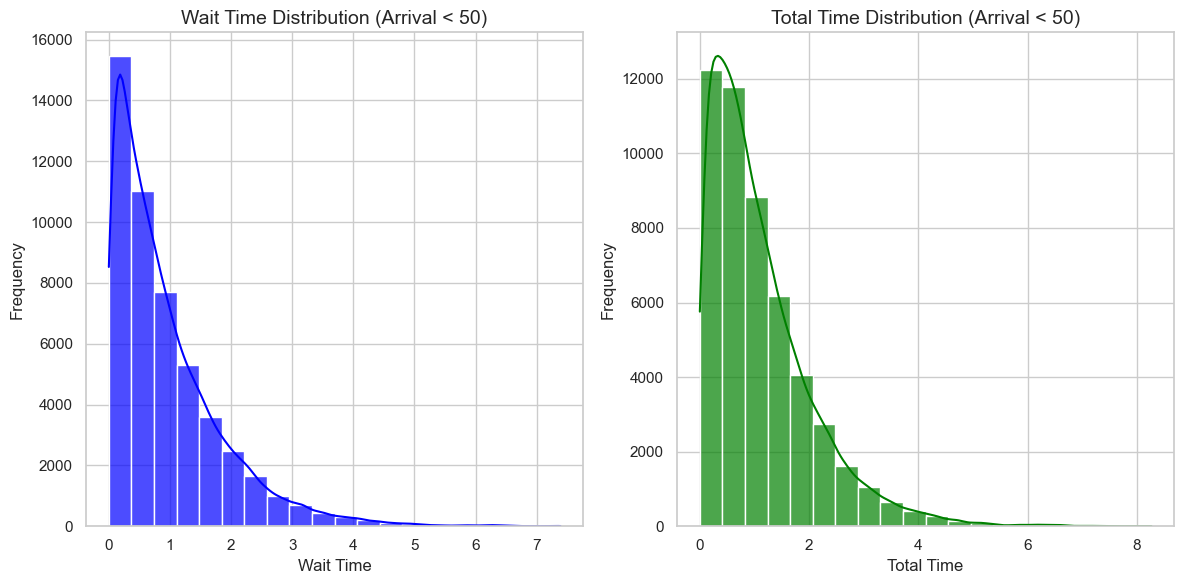

In [13]:
filtered_indices = [i for i, t in enumerate(arrival_times) if t < 40000]
filtered_wait_times = [wait_times[i] for i in filtered_indices]
filtered_total_times = [
    wait_times[i] + service_times[i] for i in filtered_indices
]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_wait_times, kde=True, bins=20, color='blue', alpha=0.7)
plt.title("Wait Time Distribution (Arrival < 50)", fontsize=14)
plt.xlabel("Wait Time", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(filtered_total_times, kde=True, bins=20, color='green', alpha=0.7)
plt.title("Total Time Distribution (Arrival < 50)", fontsize=14)
plt.xlabel("Total Time", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()